In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

# Extracting MFCC

In [2]:
audio_file = "Pakistan.wav"

In [3]:
ipd.Audio(audio_file)

In [4]:
signal, sr = librosa.load(audio_file)

In [5]:
mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)

In [6]:
mfccs.shape

(13, 132)

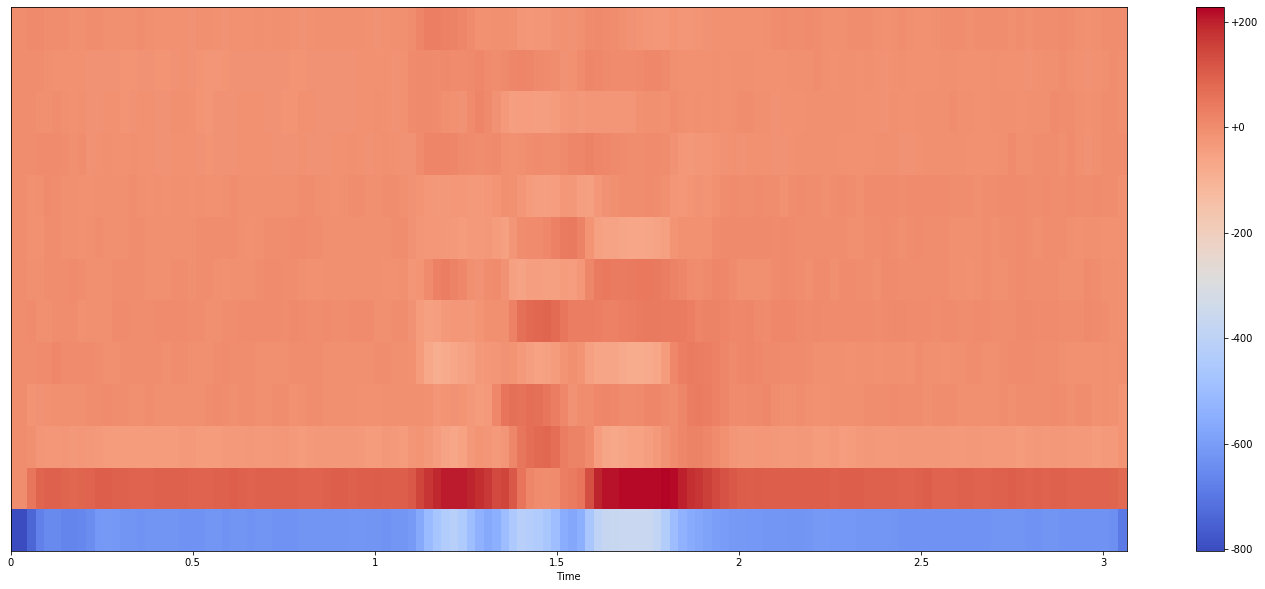

In [7]:
# Visualizing MFCC
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [8]:
delta_mfccs = librosa.feature.delta(mfccs)

In [9]:
delta2_mfccs = librosa.feature.delta(mfccs, order=2)
delta_mfccs.shape

(13, 132)

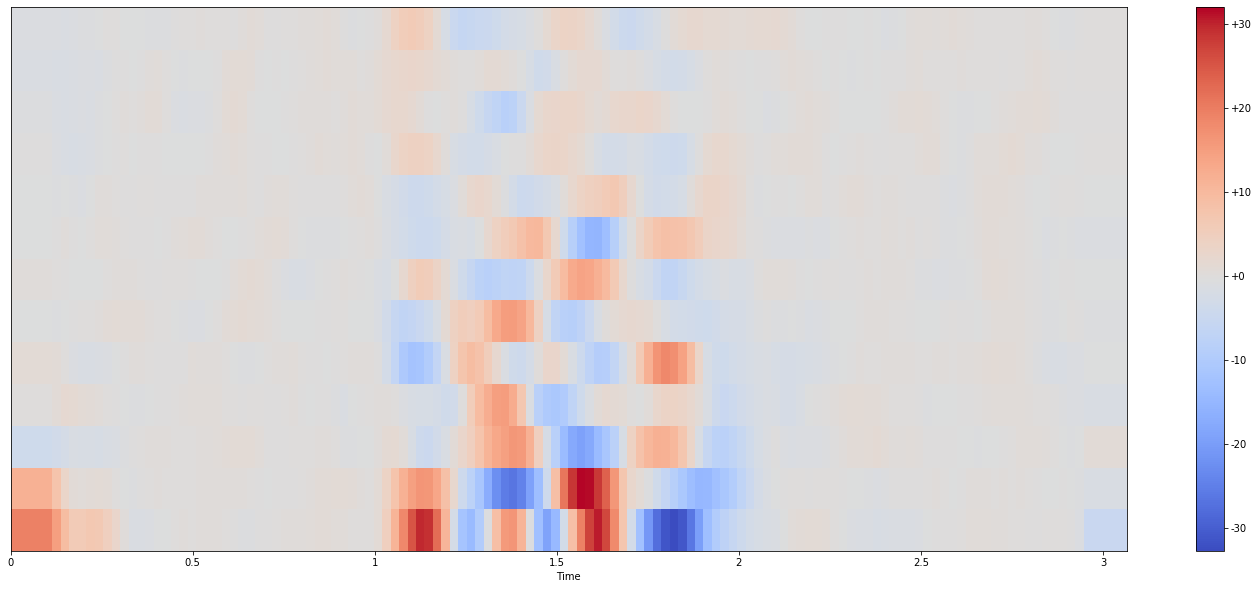

In [10]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

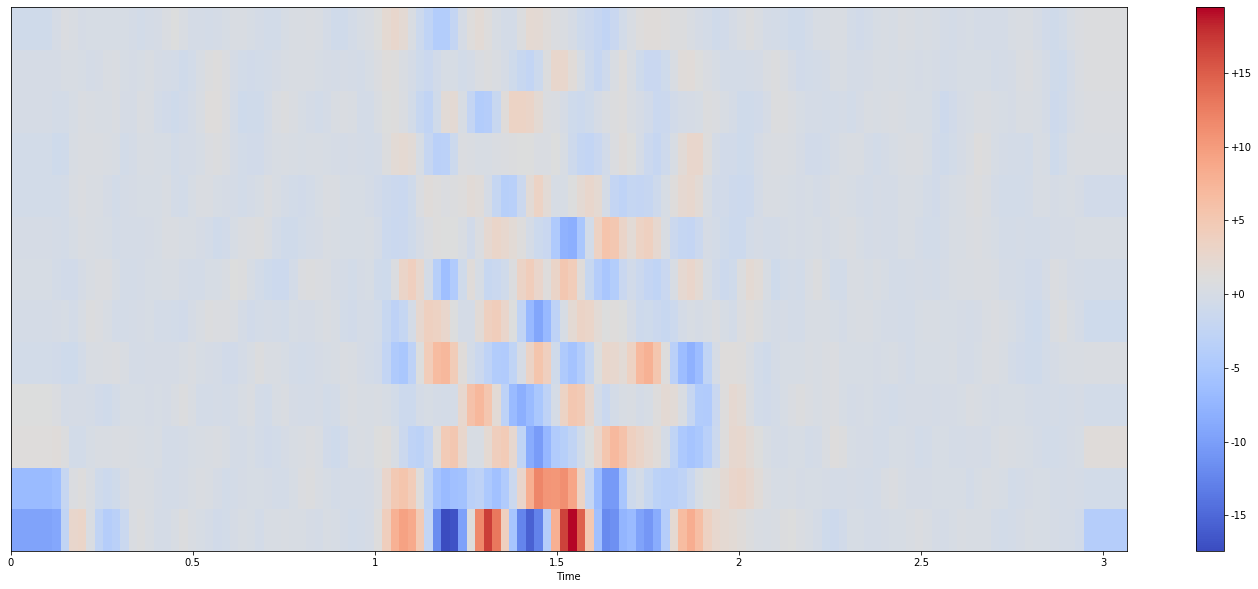

In [11]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [12]:
mfccs_features = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))

In [13]:
mfccs_features.shape

(39, 132)

# Spectrogram 

In [45]:
audio_pak = "Pakistan.wav"
audio_name = "Name.wav"
ipd.Audio(audio_pak)

In [46]:
ipd.Audio(audio_name)

In [47]:
pak, sr = librosa.load(audio_pak)
name, _ = librosa.load(audio_name)

In [48]:
# STFT
FRAME_SIZE = 2048
HOP_SIZE = 512

In [50]:
S_scale = librosa.stft(pak, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_scale.shape

(1025, 132)

In [53]:
Y_scale = np.abs(S_scale) ** 2
Y_scale.shape

(1025, 132)

In [54]:
# Visualizing Spectrogram
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")


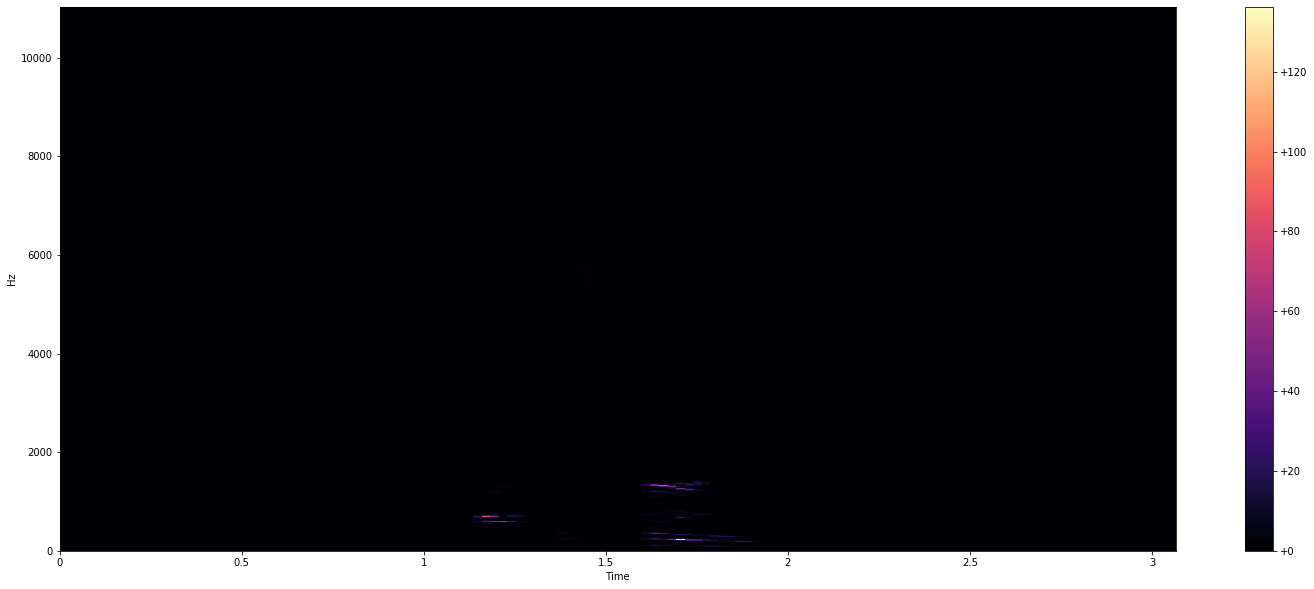

In [55]:
plot_spectrogram(Y_scale, sr, HOP_SIZE)

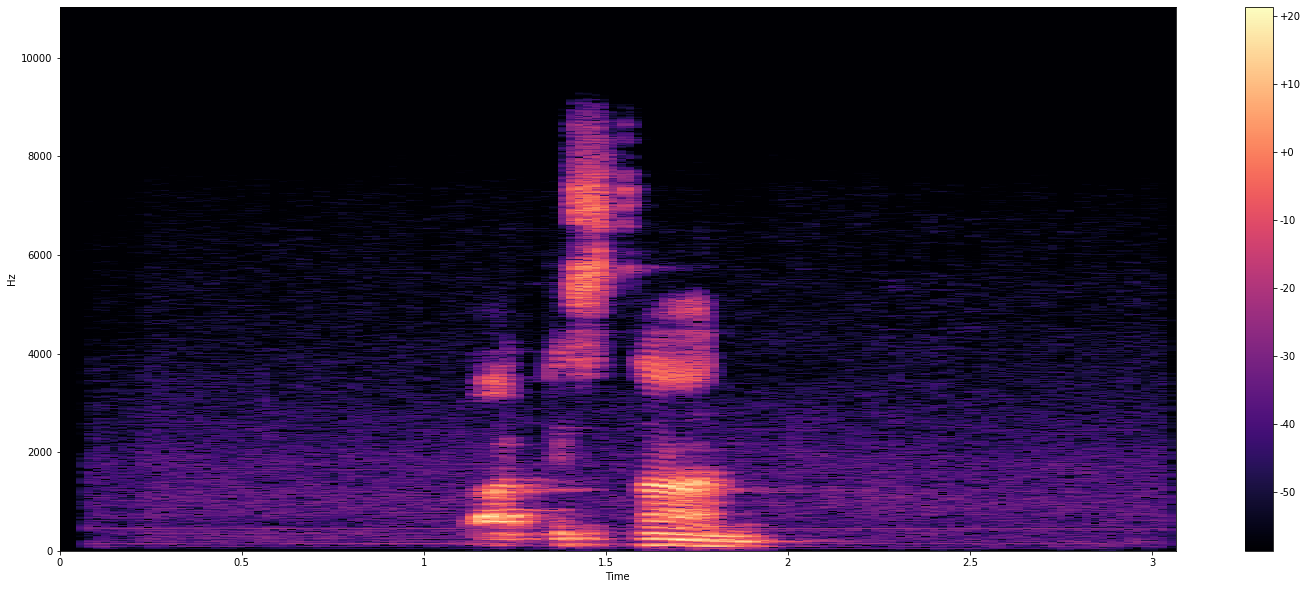

In [56]:
# Log Amplitutude Spectrogram
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

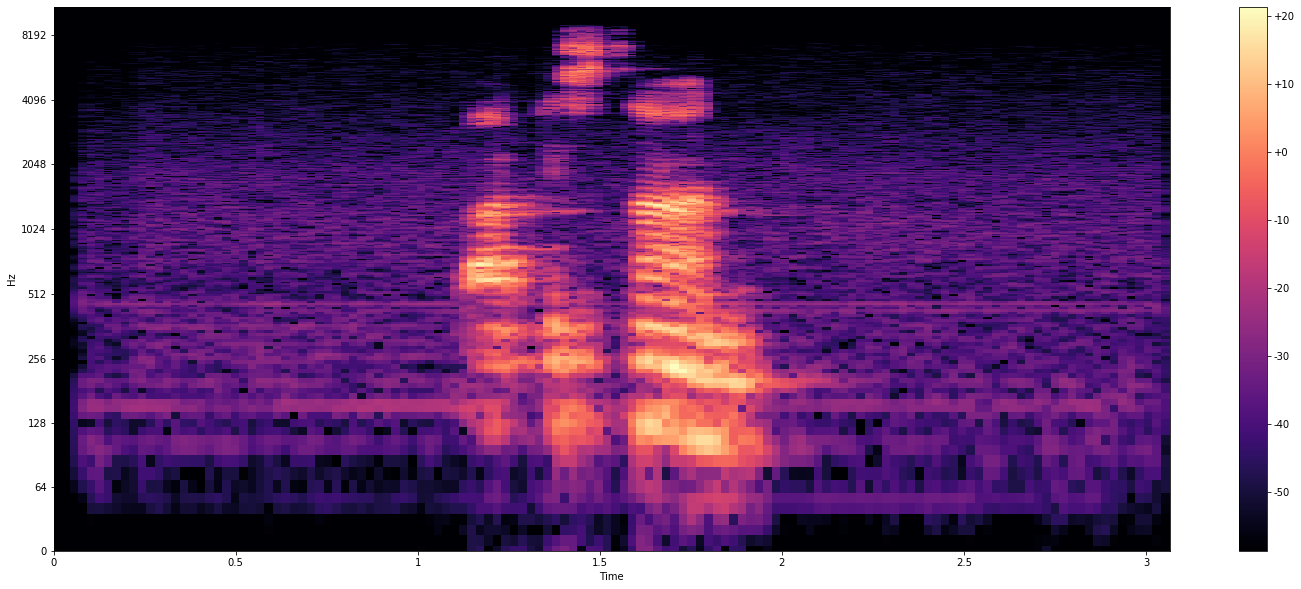

In [57]:
# Log Frequency Spectrogram
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")

In [59]:
# Visualizing multiple files
S_pak = librosa.stft(pak, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_name = librosa.stft(name, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

Y_pak = librosa.power_to_db(np.abs(S_pak) ** 2)
Y_name = librosa.power_to_db(np.abs(S_name) ** 2)

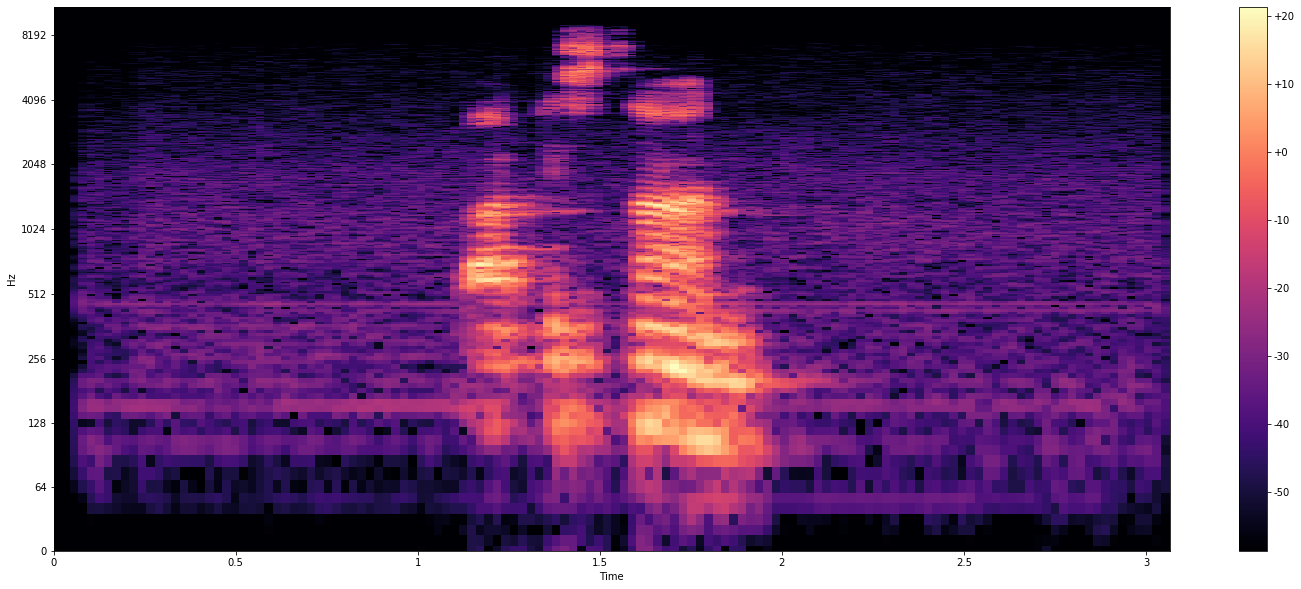

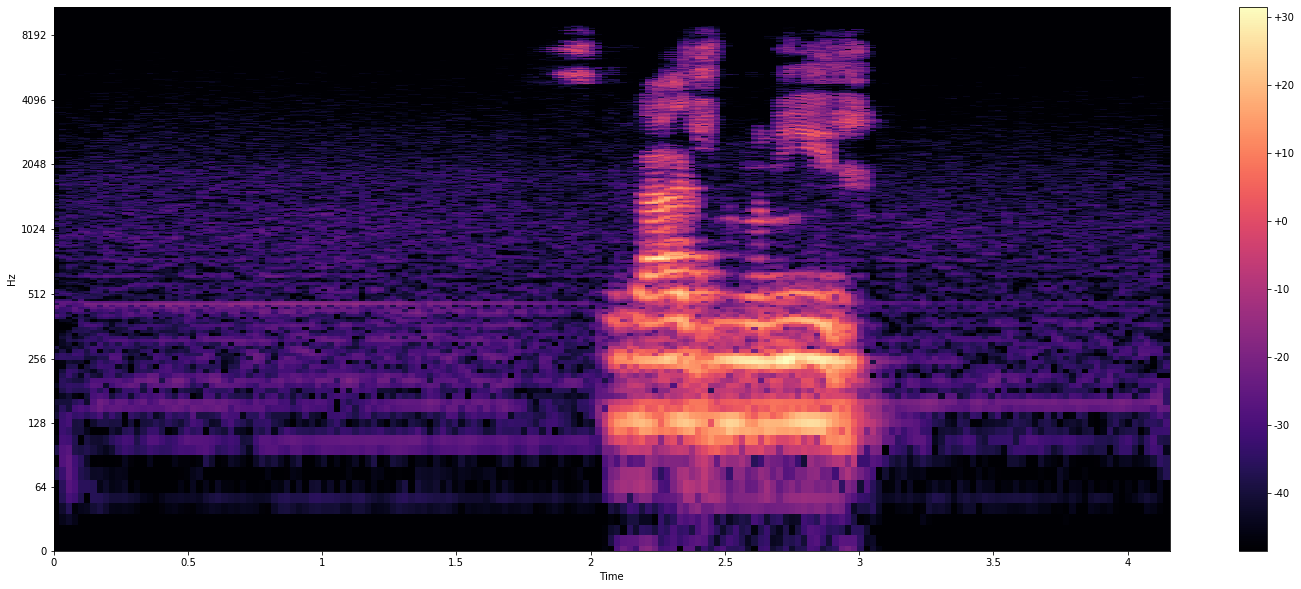

In [60]:
plot_spectrogram(Y_pak, sr, HOP_SIZE, y_axis="log")
plot_spectrogram(Y_name, sr, HOP_SIZE, y_axis="log")

# MEL Spectrogram

In [35]:
scale_file = "Name.wav"

In [37]:
ipd.Audio(scale_file)

In [38]:
scale, sr = librosa.load(scale_file)

In [39]:
#MEL Filter Bank
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)
filter_banks.shape

(10, 1025)

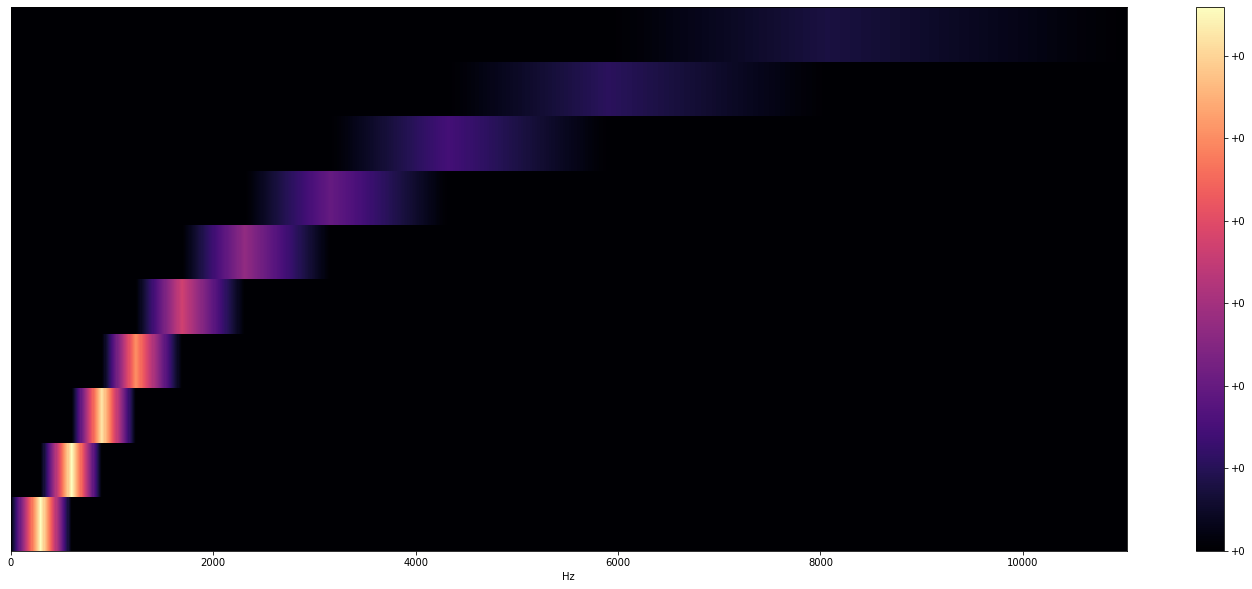

In [40]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(filter_banks, 
                         sr=sr, 
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

In [42]:
# Extracting MEL Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sr, n_fft=2048, hop_length=512, n_mels=10)
mel_spectrogram.shape

(10, 179)

In [43]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
log_mel_spectrogram.shape

(10, 179)

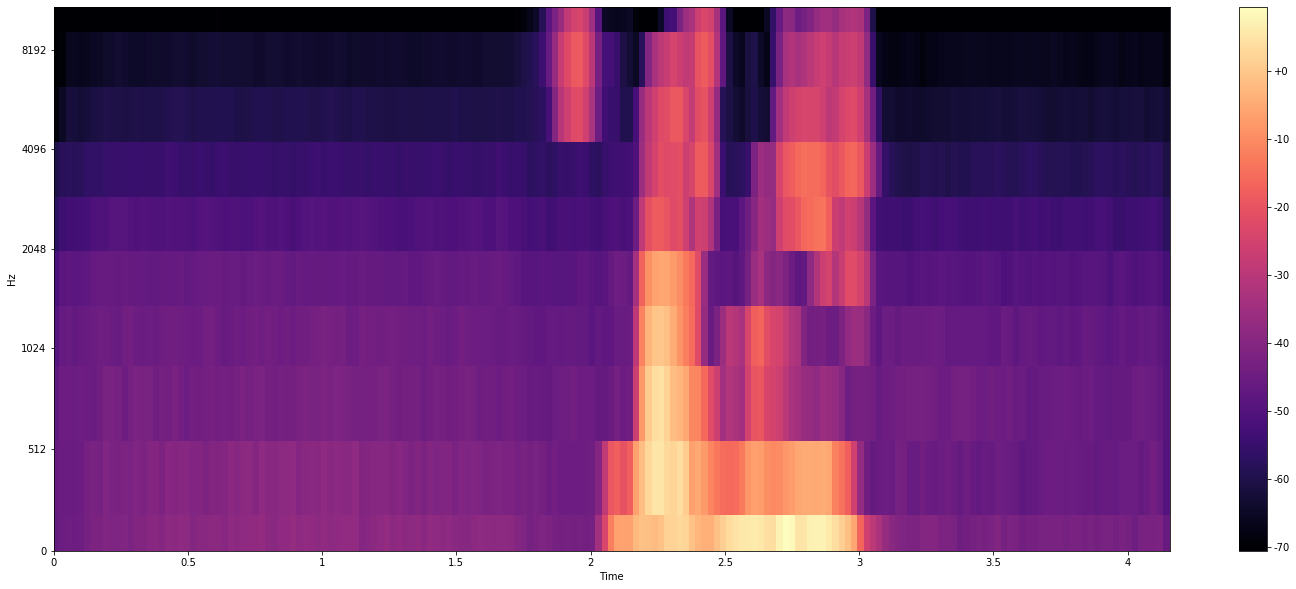

In [44]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

# Time Domain Analysis

In [67]:
import os
BASE_FOLDER = "/Users/siraj/Desktop/Workout/SP Workout"
pk_test = "Pakistan.wav"


In [68]:
ipd.Audio(os.path.join(BASE_FOLDER, pk_test))

In [69]:
pk_voice, sr = librosa.load(os.path.join(BASE_FOLDER, pk_test))

In [70]:
X = np.fft.fft(pk_voice)
len(X)

67268

In [71]:
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    X = np.fft.fft(signal)
    X_mag = np.absolute(X)
    
    plt.figure(figsize=(18, 5))
    
    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag)*f_ratio)  
    
    plt.plot(f[:f_bins], X_mag[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)

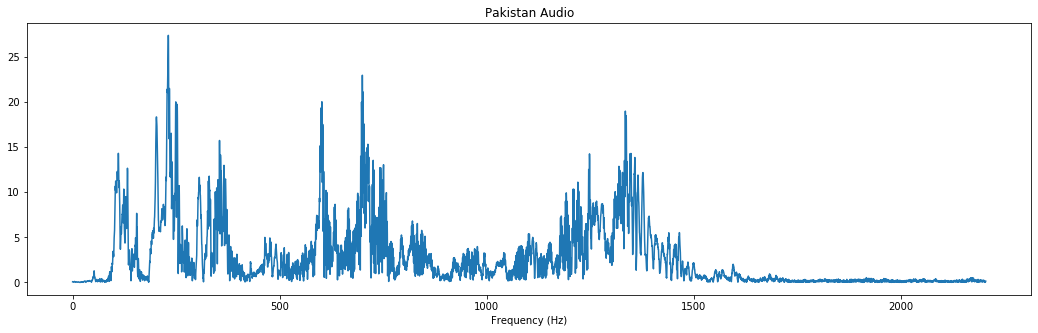

In [72]:
plot_magnitude_spectrum(pk_voice, sr, "Pakistan Audio", 0.1)